(813, '\n')
36
(2, 813)
100
(3, 813)
359
(4, 813)
73
(5, 813)
142
(6, 813)
20
(7, 813)
14
(8, 813)
6504
(6504, 6504, 6504)
*****************COSINE KNN***********************
('Accuracy', 82.889344262295083)
('Error Rate', 17.110655737704917)
             precision    recall  f1-score   support

          1       0.57      0.56      0.56       241
          2       0.92      1.00      0.96       250
          3       0.77      0.86      0.81       244
          4       0.70      0.61      0.65       217
          5       0.90      0.93      0.91       258
          6       0.82      0.72      0.77       258
          7       0.95      0.92      0.94       247
          8       0.95      1.00      0.97       237

avg / total       0.83      0.83      0.83      1952

Confusion matrix
[[134   4  35  27   4  24   6   7]
 [  0 250   0   0   0   0   0   0]
 [ 11   8 211   6   4   4   0   0]
 [ 40   5  14 133   6  12   2   5]
 [  4   4   5   6 239   0   0   0]
 [ 26   0   9  19  14 186   3   1

('Accuracy', 83.606557377049185)
('Error Rate', 16.393442622950815)
             precision    recall  f1-score   support

          1       0.62      0.54      0.58       241
          2       0.92      1.00      0.96       250
          3       0.77      0.86      0.81       244
          4       0.69      0.61      0.65       217
          5       0.90      0.93      0.91       258
          6       0.82      0.72      0.77       258
          7       0.92      1.00      0.96       247
          8       0.96      1.00      0.98       237

avg / total       0.83      0.84      0.83      1952

Confusion matrix
[[130   4  36  27   4  24   9   7]
 [  0 250   0   0   0   0   0   0]
 [ 11   8 211   6   4   4   0   0]
 [ 37   5  14 132   6  12   9   2]
 [  4   4   5   6 239   0   0   0]
 [ 26   0   9  19  14 186   3   1]
 [  0   0   0   0   0   0 247   0]
 [  0   0   0   0   0   0   0 237]]
*****************MANHATTAN BALL KNN***********************
('Accuracy', 83.299180327868854)
('Error R

/home/abc/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion matrix
[[  0   0   0 241   0   0   0   0]
 [  0   0   0 250   0   0   0   0]
 [  0   0   0 244   0   0   0   0]
 [  0   0   0 217   0   0   0   0]
 [  0   0   0 258   0   0   0   0]
 [  0   0   0 258   0   0   0   0]
 [  0   0   0 247   0   0   0   0]
 [  0   0   0 237   0   0   0   0]]
**************RADIAL SVM************************
('Accuracy: ', 61.577868852459019)
('Error Rate', 38.422131147540981)
             precision    recall  f1-score   support

          1       0.59      0.51      0.55       241
          2       0.74      0.92      0.82       250
          3       0.33      0.29      0.31       244
          4       0.39      0.76      0.51       217
          5       0.94      0.34      0.50       258
          6       0.82      0.47      0.60       258
          7       0.62      0.87      0.72       247
          8       0.94      0.79      0.86       237

avg / total       0.68      0.62      0.61      1952

Confusion matrix
[[123   9  15  62   1  17  13   1

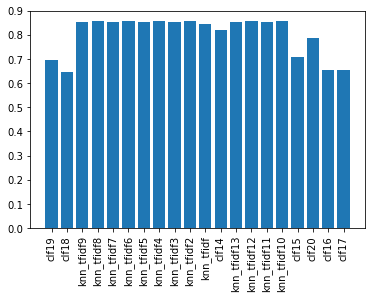

*******ROC CURVE************************
('ROC_tc', 1317    4
1662    6
1288    4
1586    6
638     1
1460    5
1683    7
909     3
1590    6
1687    7
890     3
1679    7
153     1
821     1
1670    7
1469    5
1671    7
176     1
201     1
1697    8
1699    8
1692    8
702     1
1417    4
451     1
1674    7
1697    8
1294    4
1596    6
1679    7
       ..
858     2
723     1
927     3
868     2
1693    8
1530    6
523     1
1246    4
860     2
1629    6
1676    7
1577    6
1685    7
1505    5
1698    8
1674    7
1676    7
1676    7
872     3
1521    5
940     3
1694    8
751     1
78      1
866     2
801     1
1013    4
1511    5
1694    8
1000    4
Name: category, Length: 1952, dtype: object)
('Probas: ', array([ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.875]))


ValueError: Data is not binary and pos_label is not specified

In [2]:
import pickle
import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import NMF
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import math

%matplotlib inline

dataSet =  pd.read_csv("combinedDS.csv" , sep=','  , header=0 )#, skiprows=2)

#print(text)
#print(dataSet['category'])
dataSet = dataSet[dataSet.category != 'category']  
dataSet = dataSet.dropna(subset=['MessContents'])
categories=["1","2","3","4","5","6","7","8"]


"""text = dataSet['MessContents']
category = dataSet['category']"""


df_majority = dataSet[dataSet.category == '1'] 
#print(len(df_majority) ,"\n")
orig_len = len(df_majority)

for i in range(2,9):
    df_minority = dataSet[dataSet.category == str(i) ]
    #print(len(df_minority))
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples= orig_len,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority = pd.concat([df_majority, df_minority_upsampled])
    #print(i , len(df_minority_upsampled))
 

df_upsampled =  df_majority
#print(len(df_majority) )


text = df_upsampled['MessContents']
category = df_upsampled['category']



vectorizer = TfidfVectorizer(max_df=0.5, max_features=10000,
                             min_df=2, stop_words='english',
                             use_idf=True)
#vectorizer.fit(text)
text_tfidf = vectorizer.fit_transform(text)

#print(text)
#print(vectorizer.vocabulary_)
#print(vectorizer.idf_)
svd = TruncatedSVD(100)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
#************************Is the final 2D aray to be used
text_lsa = lsa.fit_transform(text_tfidf)


lsa2 = NMF(n_components=100)
text_lsa2 = lsa2.fit_transform(text_tfidf)
text_lsa2 = Normalizer(copy=False).fit_transform(text_lsa2)


print(len(category) , len(text) , len(text_lsa)) 
#print(text_tfidf)

#print(text_lsa) #Is the final 2D aray to be used  

x_train, x_test, y_train, y_test = train_test_split(text_lsa, category, test_size=0.30, shuffle=True)
#print("trainData",x_train)
#print("testData",x_test)
#print("trainLabels",y_train)
#print("testLabels",y_test)


#KNN with k=8

print("*****************COSINE KNN***********************")

knn_tfidf = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='cosine')
#print("Training")
knn_tfidf.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p = knn_tfidf.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred = knn_tfidf.predict(x_test)
acc = accuracy_score(y_test, pred)
print("Accuracy",acc*100)
print("Error Rate",(1-(acc))*100)


print(classification_report(y_test, pred, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred))

print("*****************EUCLIDEAN KNN***********************")


knn_tfidf2 = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='euclidean')
#print("Training")
knn_tfidf2.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p2 = knn_tfidf2.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred2 = knn_tfidf2.predict(x_test)
acc2 = accuracy_score(y_test, pred2)
print("Accuracy",acc2*100)
print("Error Rate",(1-(acc2))*100)

print(classification_report(y_test, pred2, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred2))


print("*****************MANHATTAN KNN***********************")


knn_tfidf3 = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='manhattan')
#print("Training")
knn_tfidf3.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p3 = knn_tfidf3.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred3 = knn_tfidf3.predict(x_test)
acc3 = accuracy_score(y_test, pred3)
print("Accuracy",acc3*100)
print("Error Rate",(1-(acc3))*100)

print(classification_report(y_test, pred3, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred3))



print("*****************MINKOWSKI KNN***********************")


knn_tfidf4 = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='minkowski')
#print("Training")
knn_tfidf4.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p4 = knn_tfidf4.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred4 = knn_tfidf4.predict(x_test)
acc4 = accuracy_score(y_test, pred4)
print("Accuracy",acc4*100)
print("Error Rate",(1-(acc4))*100)

print(classification_report(y_test, pred4, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred4))

print("*****************CHEBYSHEV KNN***********************")


knn_tfidf5 = KNeighborsClassifier(n_neighbors=8, algorithm='brute', metric='chebyshev')
#print("Training")
knn_tfidf5.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p5 = knn_tfidf5.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred5 = knn_tfidf5.predict(x_test)
acc5 = accuracy_score(y_test, pred5)
print("Accuracy",acc5*100)
print("Error Rate",(1-(acc5))*100)

print(classification_report(y_test, pred5, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred5))


print("*****************EUCLIDEAN KD KNN***********************")


knn_tfidf6 = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', metric='euclidean')
#print("Training")
knn_tfidf6.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p6 = knn_tfidf6.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred6 = knn_tfidf6.predict(x_test)
acc6 = accuracy_score(y_test, pred6)
print("Accuracy",acc6*100)
print("Error Rate",(1-(acc6))*100)

print(classification_report(y_test, pred6, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred6))


print("*****************MANHATTAN KD KNN***********************")


knn_tfidf7 = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', metric='manhattan')
#print("Training")
knn_tfidf7.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p7 = knn_tfidf7.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred7 = knn_tfidf7.predict(x_test)
acc7 = accuracy_score(y_test, pred7)
print("Accuracy",acc7*100)
print("Error Rate",(1-(acc7))*100)

print(classification_report(y_test, pred7, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred7))



print("*****************MINKOWSKI KD KNN***********************")


knn_tfidf8 = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', metric='minkowski')
#print("Training")
knn_tfidf8.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p8 = knn_tfidf8.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred8 = knn_tfidf8.predict(x_test)
acc8 = accuracy_score(y_test, pred8)
print("Accuracy",acc8*100)
print("Error Rate",(1-(acc8))*100)

print(classification_report(y_test, pred8, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred8))

print("*****************CHEBYSHEV KD KNN***********************")


knn_tfidf9 = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', metric='chebyshev')
#print("Training")
knn_tfidf9.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p9 = knn_tfidf9.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred9 = knn_tfidf9.predict(x_test)
acc9 = accuracy_score(y_test, pred9)
print("Accuracy",acc9*100)
print("Error Rate",(1-(acc9))*100)

print(classification_report(y_test, pred9, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred9))

print("*****************EUCLIDEAN BALL KNN***********************")


knn_tfidf10 = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree', metric='euclidean')
#print("Training")
knn_tfidf10.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p10 = knn_tfidf10.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred10 = knn_tfidf10.predict(x_test)
acc10 = accuracy_score(y_test, pred10)
print("Accuracy",acc10*100)
print("Error Rate",(1-(acc10))*100)

print(classification_report(y_test, pred10, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred10))


print("*****************MANHATTAN BALL KNN***********************")


knn_tfidf11 = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree', metric='manhattan')
#print("Training")
knn_tfidf11.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p11 = knn_tfidf11.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred11 = knn_tfidf11.predict(x_test)
acc11 = accuracy_score(y_test, pred11)
print("Accuracy",acc11*100)
print("Error Rate",(1-(acc11))*100)

print(classification_report(y_test, pred11, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred11))



print("*****************MINKOWSKI BALL KNN***********************")


knn_tfidf12 = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree', metric='minkowski')
#print("Training")
knn_tfidf12.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p12 = knn_tfidf12.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred12 = knn_tfidf12.predict(x_test)
acc12 = accuracy_score(y_test, pred12)
print("Accuracy",acc12*100)
print("Error Rate",(1-(acc12))*100)

print(classification_report(y_test, pred12, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred12))

print("*****************CHEBYSHEV BALL KNN***********************")


knn_tfidf13 = KNeighborsClassifier(n_neighbors=8, algorithm='ball_tree', metric='chebyshev')
#print("Training")
knn_tfidf13.fit(x_train, y_train)

# Classify the test vectors.
#print("Testing")
#print ("Emails: ",x_test)
p13 = knn_tfidf13.predict(x_test)
#print ("Classification: ",p)

#Calculating accuracy
pred13 = knn_tfidf13.predict(x_test)
acc13 = accuracy_score(y_test, pred13)
print("Accuracy",acc13*100)
print("Error Rate",(1-(acc13))*100)

print(classification_report(y_test, pred13, target_names=categories))

#Confusion Matrix
print ("Confusion matrix")
print(confusion_matrix(y_test,pred13))

print("*************LINEAR SVM************************")

#SVM with linear kernel
clf14=svm.SVC(kernel='linear',C=1.0)
#print ("Training")
clf14.fit(x_train,y_train)

#print ("Testing")
predicted14=clf14.predict(x_test)
accuracy14=np.mean(predicted14==y_test)
print ("Accuracy: ",accuracy14*100)
print("Error Rate",(1-(accuracy14))*100)

print(classification_report(y_test, predicted14, target_names=categories))

#print ("Emails: ",x_test)
classification14=clf14.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification14))

print("************POLY SVM*************************")

#SVM with poly kernel
clf15=svm.SVC(kernel='poly',C=1.0)
#print ("Training")
clf15.fit(x_train,y_train)

#print ("Testing")
predicted15=clf15.predict(x_test)
accuracy15=np.mean(predicted15==y_test)
print ("Accuracy: ",accuracy15*100)
print("Error Rate",(1-(accuracy15))*100)

print(classification_report(y_test, predicted15, target_names=categories))

#print ("Emails: ",x_test)
classification15=clf15.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification15))

print("**************RADIAL SVM************************")

clf16=svm.SVC(kernel='rbf',C=1.0)
#print ("Training")
clf16.fit(x_train,y_train)

#print ("Testing")
predicted16=clf16.predict(x_test)
accuracy16=np.mean(predicted16==y_test)
print ("Accuracy: ",accuracy16*100)
print("Error Rate",(1-(accuracy16))*100)

print(classification_report(y_test, predicted16, target_names=categories))

#print ("Emails: ",x_test)
classification16=clf16.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification16))

print("**************SIGMOID SVM************************")

clf17=svm.SVC(kernel='rbf',C=1.0)
#print ("Training")
clf17.fit(x_train,y_train)

#print ("Testing")
predicted17=clf17.predict(x_test)
accuracy17=np.mean(predicted17==y_test)
print ("Accuracy: ",accuracy17*100)
print("Error Rate",(1-(accuracy17))*100)

print(classification_report(y_test, predicted17, target_names=categories))

#print ("Emails: ",x_test)
classification17=clf17.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification17))


print("**************Gaussian Naive Bayes************************")

clf18=GaussianNB()
#print ("Training")
clf18.fit(x_train,y_train)
GaussianNB(priors=None)
#print ("Testing")
predicted18=clf18.predict(x_test)
accuracy18=np.mean(predicted18==y_test)
print ("Accuracy: ",accuracy18*100)
print("Error Rate",(1-(accuracy18))*100)

print(classification_report(y_test, predicted18, target_names=categories))

#print ("Emails: ",x_test)
classification18=clf18.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification18))


print("**************MULTINOMIAL Naive Bayes************************")
x_train, x_test, y_train, y_test = train_test_split(text_lsa2, category, test_size=0.30, shuffle=True)
#Multinomial Bayes
clf19 = MultinomialNB(alpha=0.01)
#print ("Training")
clf19.fit(x_train, y_train)
#print ("Testing")
predicted19=clf19.predict(x_test)
accuracy19=np.mean(predicted19==y_test)
print ("Accuracy: ",accuracy19*100)
print("Error Rate",(1-(accuracy19))*100)

print(classification_report(y_test, predicted19, target_names=categories))

#print ("Emails: ",x_test)
classification19=clf19.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification19))





print("*************LOGISTIC REGRESSION************************")


clf20=LogisticRegression(random_state=0)
clf20.fit(x_train,y_train)

#print ("Testing")
predicted20=clf20.predict(x_test)
accuracy20=np.mean(predicted20==y_test)
print ("Accuracy: ",accuracy20*100)
print("Error Rate",(1-(accuracy20))*100)

print(classification_report(y_test, predicted20, target_names=categories))

#print ("Emails: ",x_test)
classification20=clf20.predict(x_test)
#print ("Classification: ",classification)

print ("Confusion matrix")
print(confusion_matrix(y_test,classification20))


print("*************BEST MODEL************************")
results={}
kfold=5
results['knn_tfidf']=model_selection.cross_val_score(knn_tfidf,text_lsa,category,cv=kfold).mean()
results['knn_tfidf2']=model_selection.cross_val_score(knn_tfidf2,text_lsa,category,cv=kfold).mean()
results['knn_tfidf3']=model_selection.cross_val_score(knn_tfidf3,text_lsa,category,cv=kfold).mean()
results['knn_tfidf4']=model_selection.cross_val_score(knn_tfidf4,text_lsa,category,cv=kfold).mean()
results['knn_tfidf5']=model_selection.cross_val_score(knn_tfidf5,text_lsa,category,cv=kfold).mean()
results['knn_tfidf6']=model_selection.cross_val_score(knn_tfidf6,text_lsa,category,cv=kfold).mean()
results['knn_tfidf7']=model_selection.cross_val_score(knn_tfidf7,text_lsa,category,cv=kfold).mean()
results['knn_tfidf8']=model_selection.cross_val_score(knn_tfidf8,text_lsa,category,cv=kfold).mean()
results['knn_tfidf9']=model_selection.cross_val_score(knn_tfidf9,text_lsa,category,cv=kfold).mean()
results['knn_tfidf10']=model_selection.cross_val_score(knn_tfidf10,text_lsa,category,cv=kfold).mean()
results['knn_tfidf11']=model_selection.cross_val_score(knn_tfidf11,text_lsa,category,cv=kfold).mean()
results['knn_tfidf12']=model_selection.cross_val_score(knn_tfidf12,text_lsa,category,cv=kfold).mean()
results['knn_tfidf13']=model_selection.cross_val_score(knn_tfidf13,text_lsa,category,cv=kfold).mean()
results['clf14']=model_selection.cross_val_score(clf14,text_lsa,category,cv=kfold).mean()
results['clf15']=model_selection.cross_val_score(clf15,text_lsa,category,cv=kfold).mean()
results['clf16']=model_selection.cross_val_score(clf16,text_lsa,category,cv=kfold).mean()
results['clf17']=model_selection.cross_val_score(clf17,text_lsa,category,cv=kfold).mean()
results['clf18']=model_selection.cross_val_score(clf18,text_lsa,category,cv=kfold).mean()
results['clf19']=model_selection.cross_val_score(clf19,text_lsa2,category,cv=kfold).mean()
results['clf20']=model_selection.cross_val_score(clf20,text_lsa,category,cv=kfold).mean()
plt.bar(range(len(results)),results.values(),align='center')
plt.xticks(range(len(results)),list(results.keys()),rotation='vertical')
plt.show()

print("*******ROC CURVE************************")

models = [
    {
        'label' : 'knn_tfidf',
        'model': knn_tfidf,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf2',
        'model': knn_tfidf2,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf3',
        'model': knn_tfidf3,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf4',
        'model': knn_tfidf4,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf5',
        'model': knn_tfidf5,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf6',
        'model': knn_tfidf6,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf7',
        'model': knn_tfidf7,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf8',
        'model': knn_tfidf8,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf9',
        'model': knn_tfidf9,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf10',
        'model': knn_tfidf10,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf11',
        'model': knn_tfidf11,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf12',
        'model': knn_tfidf12,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'knn_tfidf13',
        'model': knn_tfidf13,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf14',
        'model': clf14,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf15',
        'model': clf15,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf16',
        'model': clf16,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf17',
        'model': clf17,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf18',
        'model': clf18,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf19',
        'model': clf19,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    },
    {
        'label' : 'clf20',
        'model': clf20,
        'roc_train': x_train,
        'roc_test': x_test,
        'roc_train_class': y_train,        
        'roc_test_class': y_test,                
    }
            
]


plt.clf()
plt.figure(figsize=(8,6))

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    for i in range(9):
        print ("ROC_tc" , m['roc_test_class'])
        print("Probas: " , probas[:, i+1])
        fpr[i], tpr[i],_ = roc_curve(m['roc_test_class'], probas[:, i+1])
        roc_auc[i]  = auc(fpr[i], tpr[i])
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()
